In [0]:
#This precedure is used to kaggle 

In this document because of the colab is different to our computer, and our train data and test data for this problem is in google Drive,. so we have to connect to our google drive and as a pan drive.

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

from previous precedure, the google drive is connect to our VM,and as a pan drive. and we make a directory and name is my drive

In [0]:
!mkdir -p MyDrive
!google-drive-ocamlfuse MyDrive

read the google drive document by pandas

In [0]:
import pandas as pd
train = pd.read_csv('MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('MyDrive/Colab Notebooks/test.csv')

In [0]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
X_train = X_train.reshape([-1,784])
Y_train = y_train.reshape([-1,1])

In [0]:
print (X_train.shape)

(60000, 784)


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib

# Import PCA
from sklearn.decomposition import PCA


In [0]:
#将数据集进行标准化处理
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

# 计算协方差矩阵的特征值和特征向量
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#创建（特征值，特征向量）元组对 的列表
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals) #特征值的和
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] #单个特征值所占的比重
cum_var_exp = np.cumsum(var_exp) # 特征值累计比重

(784, 9)
(60000, 9)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


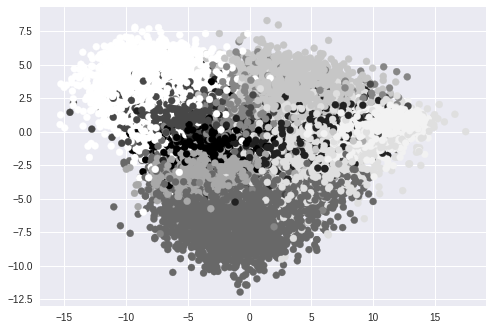

In [0]:

import numpy as np


import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

 

 

def LDA_dimensionality(X, y, k):

    '''

    X为数据集，y为label，k为目标维数

    '''

    label_ = list(set(y))

 

    X_classify = {}

 

    for label in label_:

        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])

        X_classify[label] = X1

 

    mju = np.mean(X, axis=0)

    mju_classify = {}

 

    for label in label_:

        mju1 = np.mean(X_classify[label], axis=0)

        mju_classify[label] = mju1

 

    #St = np.dot((X - mju).T, X - mju)

 

    Sw = np.zeros((len(mju), len(mju)))+ 0.0001*np.eye(len(mju))  # 计算类内散度矩阵

    for i in label_:

        Sw += np.dot((X_classify[i] - mju_classify[i]).T,

                     X_classify[i] - mju_classify[i])

 

    # Sb=St-Sw

 

    Sb = np.zeros((len(mju), len(mju)))  # 计算类间散度矩阵

    for i in label_:

        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(

            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

 

    eig_vals, eig_vecs = np.linalg.eig(

        np.linalg.inv(Sw).dot(Sb))  # 计算Sw-1*Sb的特征值和特征矩阵

 

    sorted_indices = np.argsort(eig_vals)

    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # 提取前k个特征向量

    return topk_eig_vecs


if '__main__' == __name__:
    X = X_train
    y = y_train
    W = LDA_dimensionality(X, y, 9)
    print (W.shape)
    X_new = np.dot((X), W)
    
    print (X_new.shape)
    plt.figure(1)
    plt.scatter(X_new[:, 1], X_new[:, 2], marker='o', c=y)
    plt.show()


In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 1 , weights='distance')
clf.fit(X, y)

print ('Train Score:%f' %clf.score(X,y))


Train Score:1.000000


In [0]:
X_test = X_test.reshape([-1,784])
Y_test = y_test.reshape([-1,1])

In [0]:
print (X_test.shape)

(10000, 784)


In [0]:
print ('Train Score:%f' %clf.score(X_test,Y_test))

Train Score:0.969100


In [0]:
X_pre = X_test[300:400,:]
print (X_pre.shape)

(100, 784)


In [0]:
print (clf.predict(X_pre))

[1 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 7 7 9 3 0 4 2 0 7 1 1 2 1 5 3 3 9
 7 8 6 5 4 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 4 9 4 6 2 2 5 0 6 5 6 3 7 2 0 8
 8 5 4 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4]


In [0]:
print (Y_test.reshape([1,-1])[0,300:400])

[4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3 0 4 2 0 7 1 1 2 1 5 3 3 9
 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3 7 2 0 8
 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4]


In [0]:
X_test115 = X_test[338,:].reshape([28,28])

(28, 28)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


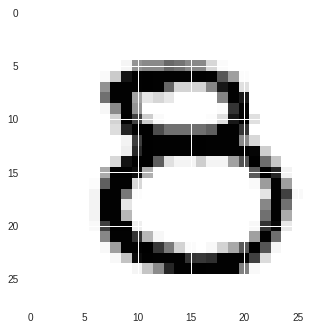

In [0]:
import scipy.misc
print (X_test115.shape)
plt.imshow(X_test115)
scipy.misc.imsave("MyDrive/Colab Notebooks/338_T8_P8.jpg",np.array(X_test115))
plt.show()


In [0]:
def Normalize(data):
    m = np.mean(data)
    mx = data.max()
    mn = data.min()
    return [(float(i) - m) / (mx - mn) for i in data]

In [0]:
Pat = W[:,3].reshape([28,28])
plt.imshow(Normalize(Pat.real))
plt.show()

ValueError: ignored